## Importações e Preprocessamento

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

In [2]:
(treinamento, _) , (teste,_) = mnist.load_data()

In [4]:
treinamento = treinamento.reshape((treinamento.shape[0],
                                   treinamento.shape[1], 
                                   treinamento.shape[2],
                                   1))

In [6]:
teste = teste.reshape((teste.shape[0],
                       teste.shape[1], 
                       teste.shape[2],
                       1))

In [7]:
base_treinamento = treinamento.astype('float32')/255
base_teste = teste.astype('float32')/255

## Criação e Treinamento Autoencoder

In [24]:
autoencoder = Sequential()

In [25]:
#Encoder
#Primeira camada de Conv. 16 filtros 3x3 e Max_pool de 2x2
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',
                       input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))
#Segunda camada de Conv. 8 filtros 3x3 e Max_pool de 2x2
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#Terceira camada de Conv. 8 filtros 3x3 e strides 2x2
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', 
                       padding='same', strides=(2,2)))


In [26]:
#Array entra na Flatten como 4x4x8
autoencoder.add(Flatten())
autoencoder.add(Reshape((4,4,8)))

In [27]:
#Decoder
#Decoder da terceira camada
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', 
                       padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
#Decoder da segunda camada
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
#Decoder da Primeira camada
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
#Camada final para retornar a imagem
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [28]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 4, 4, 8)           0         
__________

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])

In [30]:
autoencoder.fit(base_treinamento, base_treinamento,
                epochs=70, batch_size=256,
                validation_data=(base_teste, base_teste))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/70





60000/60000 [==============================] - 41s 691us/step - loss: 0.2755 - acc: 0.7877 - val_loss: 0.1598 - val_acc: 0.7981
Epoch 2/70
60000/60000 [==============================] - 39s 649us/step - loss: 0.1447 - acc: 0.8018 - val_loss: 0.1323 - val_acc: 0.8039
Epoch 3/70
60000/60000 [==============================] - 38s 636us/step - loss: 0.1271 - acc: 0.8064 - val_loss: 0.1200 - val_acc: 0.8070
Epoch 4/70
60000/60000 [==============================] - 39s 653us/step - loss: 0.1178 - acc: 0.8086 - val_loss: 0.1131 - val_acc: 0.8084
Epoch 5/70
60000/60000 [==============================] - 44s 733us/step - loss: 0.1122 - acc: 0.8099 - val_loss: 0.1099 - val_acc: 0.8082
Epoch 6/70
60000/60000 [==============================] - 46s 760us/step - loss: 0.1085 - acc: 0.8106 - val_loss: 0.1059 - val_ac

60000/60000 [==============================] - 51s 855us/step - loss: 0.0872 - acc: 0.8140 - val_loss: 0.0859 - val_acc: 0.8130
Epoch 45/70
60000/60000 [==============================] - 50s 829us/step - loss: 0.0870 - acc: 0.8140 - val_loss: 0.0857 - val_acc: 0.8131
Epoch 46/70
60000/60000 [==============================] - 50s 838us/step - loss: 0.0868 - acc: 0.8140 - val_loss: 0.0856 - val_acc: 0.8131
Epoch 47/70
60000/60000 [==============================] - 50s 832us/step - loss: 0.0867 - acc: 0.8141 - val_loss: 0.0854 - val_acc: 0.8131
Epoch 48/70
60000/60000 [==============================] - 50s 826us/step - loss: 0.0865 - acc: 0.8141 - val_loss: 0.0853 - val_acc: 0.8132
Epoch 49/70
60000/60000 [==============================] - 50s 833us/step - loss: 0.0863 - acc: 0.8141 - val_loss: 0.0859 - val_acc: 0.8134
Epoch 50/70
60000/60000 [==============================] - 51s 850us/step - loss: 0.0863 - acc: 0.8141 - val_loss: 0.0849 - val_acc: 0.8132
Epoch 51/70
60000/60000 [=======

## Validação e Resultados

In [31]:
imagens_decodificadas = autoencoder.predict(base_teste)

In [32]:
imagens_teste = np.random.randint(base_teste.shape[0], size = 10)

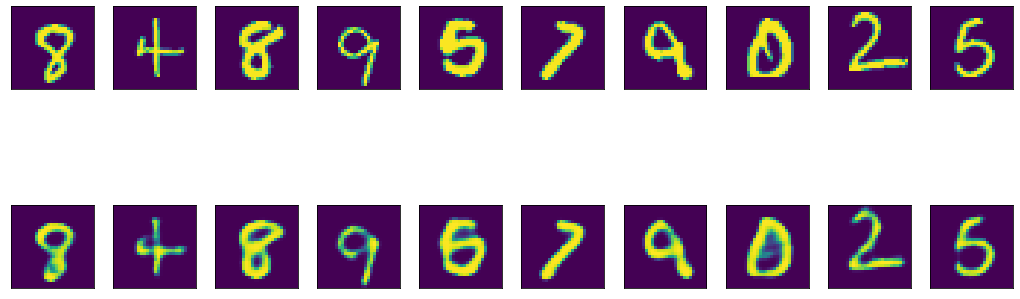

In [34]:
plt.figure(figsize=(18,18))
for i,indice in enumerate(imagens_teste):
    #Imagens Originais
    eixo = plt.subplot(10,10, i+1)
    plt.imshow(base_teste[indice].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    #Imagens Decodificadas
    eixo = plt.subplot(10,10, i+1+20)
    plt.imshow(imagens_decodificadas[indice].reshape(28,28))
    plt.xticks(())
    plt.yticks(())